In [92]:
# EXP_NAME="ViTDCNv3HeavyDetach_tuner_config_ML_1M"
# EXP_NAME="ViTDCNv3HeavyDim_tuner_config_iPinYou"
# EXP_NAME="ViTDCNv3HeavyDim_tuner_config_iPinYou"
EXP_NAME="PGAResNet_exp_crosslayer_tuner_config_iPinYou"

In [93]:
import pandas as pd

try:
    backup_df = pd.read_pickle(f"{EXP_NAME}_backup.pkl")    
except:
    backup_df= pd.DataFrame()
    print("no backup config")

no backup config


In [94]:
# backup_df= pd.DataFrame()
backup_df.head()

""


In [95]:
len(backup_df)

0

In [96]:
backup_df.columns

Index([], dtype='object')

In [97]:
# ! pip install pyyaml
# ! pip install numpy
# ! pip install matplotlib
# ! pip install pandas

In [98]:
import yaml
with open(f'config/{EXP_NAME}/model_config.yaml', 'r') as file:
    model_configs = yaml.safe_load(file)
model_configs

{'PGAResNet_iPinYou_x1_001_921a2748': {'batch_norm': True,
  'batch_size': 40960,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'mask_with_bias': True,
  'metrics': ['logloss', 'AUC'],
  'model': 'PGAResNet',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 5,
  'num_heads': 1,
  'num_shallow_cross_layers': 2,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'resnet_detach_param': True,
  'resnet_freeze': True,
  'resnet_pretrain': True,
  'resnet_type': 'resnet18',
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
 

In [99]:
model_configs

{'PGAResNet_iPinYou_x1_001_921a2748': {'batch_norm': True,
  'batch_size': 40960,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'mask_with_bias': True,
  'metrics': ['logloss', 'AUC'],
  'model': 'PGAResNet',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 5,
  'num_heads': 1,
  'num_shallow_cross_layers': 2,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'resnet_detach_param': True,
  'resnet_freeze': True,
  'resnet_pretrain': True,
  'resnet_type': 'resnet18',
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
 

In [100]:
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import yaml

results = []
with open(f"{EXP_NAME}.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        config_key = row[2].split()[1]
        test_column = row[6]
        match = re.search(r'logloss: ([0-9.]+) - AUC: ([0-9.]+)', test_column)
        if match:
            logloss = float(match.group(1))
            auc = float(match.group(2))
            # if(auc < 0.6):
            #     continue
            result = {'logloss': logloss, 'AUC': auc}
            try:
                if(len(backup_df)):
                    if(len(backup_df[(backup_df["logloss"] == logloss) & (backup_df["AUC"] == auc)])):
                        continue
                result.update(model_configs[config_key])
                results.append(result)
            except Exception as e:
                pass

In [101]:
results

[{'logloss': 0.011823,
  'AUC': 0.5,
  'batch_norm': True,
  'batch_size': 40960,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'mask_with_bias': True,
  'metrics': ['logloss', 'AUC'],
  'model': 'PGAResNet',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 5,
  'num_heads': 1,
  'num_shallow_cross_layers': 2,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'resnet_detach_param': True,
  'resnet_freeze': True,
  'resnet_pretrain': True,
  'resnet_type': 'resnet18',
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
 

In [102]:
import pandas as pd

df = pd.DataFrame(results)
df

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,deep_net_dropout,early_stop_patience,embedding_dim,embedding_regularizer,...,resnet_pretrain,resnet_type,save_best_only,seed,shallow_net_dropout,shuffle,task,use_features,verbose,vit_after_steps
0,0.011823,0.500000,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,resnet18,True,2024,0.2,True,binary_classification,None,1,0
1,0.011823,0.500000,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,resnet18,True,2024,0.2,True,binary_classification,None,1,0
2,0.005786,0.756184,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,resnet18,True,2024,0.2,True,binary_classification,None,1,0
3,0.332376,0.525262,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,False,resnet18,True,2024,0.2,True,binary_classification,None,1,0
4,0.005648,0.756607,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,False,resnet18,True,2024,0.2,True,binary_classification,None,1,0
5,0.005631,0.770055,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,False,resnet18,True,2024,0.2,True,binary_classification,None,1,0
6,0.005677,0.778903,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,resnet18,True,2024,0.2,True,binary_classification,None,1,0
7,0.005574,0.778202,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,False,resnet18,True,2024,0.2,True,binary_classification,None,1,0
8,0.005693,0.780166,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,resnet18,True,2024,0.2,True,binary_classification,None,1,0
9,0.011823,0.500000,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,resnet18,True,2024,0.2,True,binary_classification,None,1,0


In [103]:
df = pd.concat([df, backup_df])
df

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,deep_net_dropout,early_stop_patience,embedding_dim,embedding_regularizer,...,resnet_pretrain,resnet_type,save_best_only,seed,shallow_net_dropout,shuffle,task,use_features,verbose,vit_after_steps
0,0.011823,0.500000,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,resnet18,True,2024,0.2,True,binary_classification,None,1,0
1,0.011823,0.500000,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,resnet18,True,2024,0.2,True,binary_classification,None,1,0
2,0.005786,0.756184,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,resnet18,True,2024,0.2,True,binary_classification,None,1,0
3,0.332376,0.525262,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,False,resnet18,True,2024,0.2,True,binary_classification,None,1,0
4,0.005648,0.756607,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,False,resnet18,True,2024,0.2,True,binary_classification,None,1,0
5,0.005631,0.770055,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,False,resnet18,True,2024,0.2,True,binary_classification,None,1,0
6,0.005677,0.778903,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,resnet18,True,2024,0.2,True,binary_classification,None,1,0
7,0.005574,0.778202,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,False,resnet18,True,2024,0.2,True,binary_classification,None,1,0
8,0.005693,0.780166,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,resnet18,True,2024,0.2,True,binary_classification,None,1,0
9,0.011823,0.500000,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,resnet18,True,2024,0.2,True,binary_classification,None,1,0


In [104]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype('string')

In [105]:
df.dropna()

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,deep_net_dropout,early_stop_patience,embedding_dim,embedding_regularizer,...,resnet_pretrain,resnet_type,save_best_only,seed,shallow_net_dropout,shuffle,task,use_features,verbose,vit_after_steps


In [106]:
# assert False
# if(False):
#   df.to_pickle(f"{EXP_NAME}_backup.pkl")

In [107]:
metrics = ["logloss", "AUC"]
hyperparam_lst = set(df.columns) - set(metrics)
more_than_two_cols = [param for param in list(hyperparam_lst) if len(df[param].unique()) > 1 ]
more_than_two_cols

['resnet_pretrain',
 'num_deep_cross_layers',
 'resnet_freeze',
 'num_shallow_cross_layers',
 'mask_with_bias']

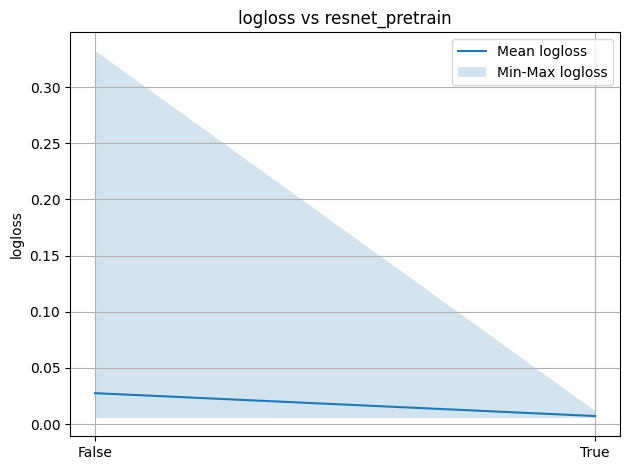

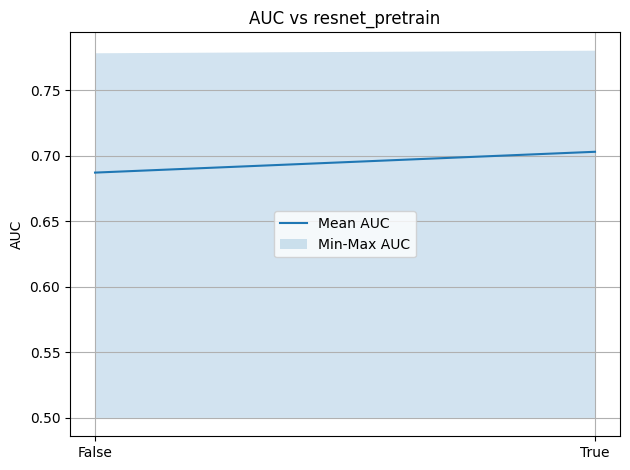

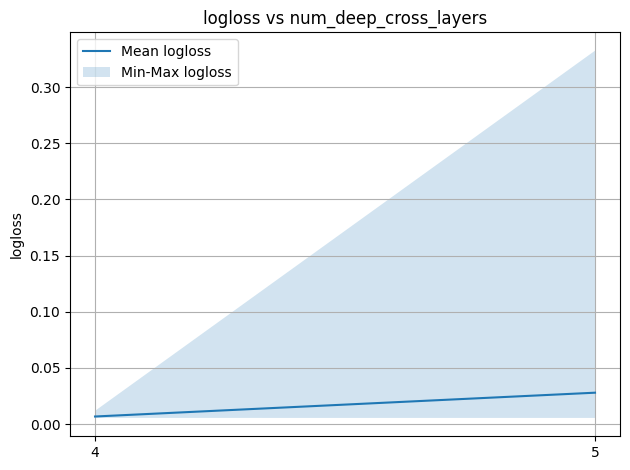

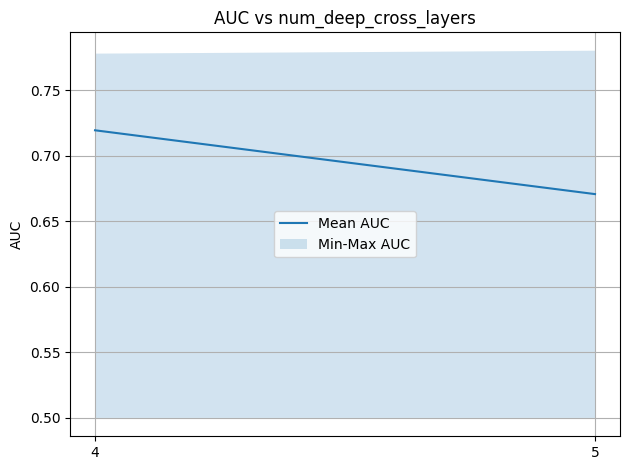

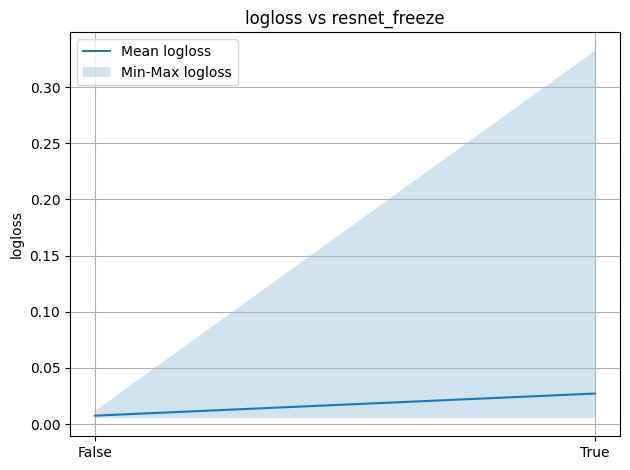

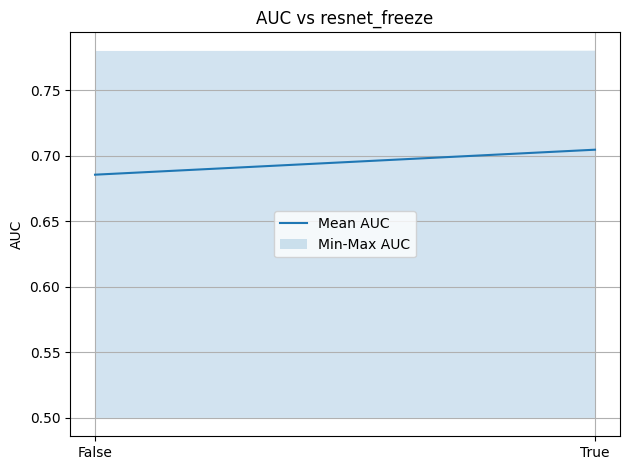

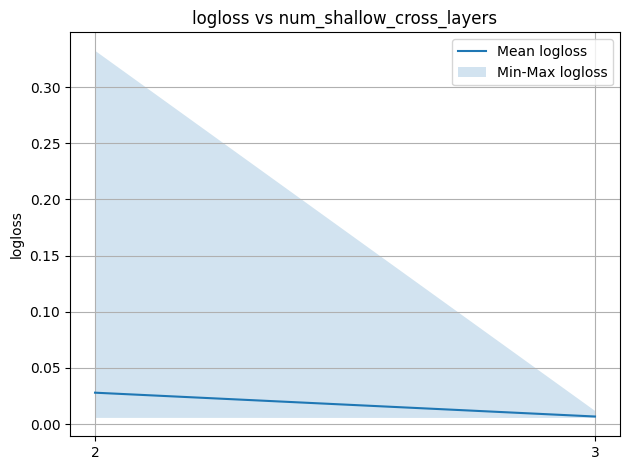

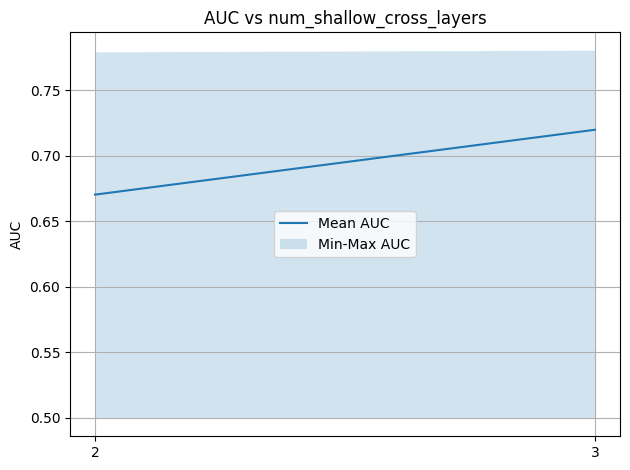

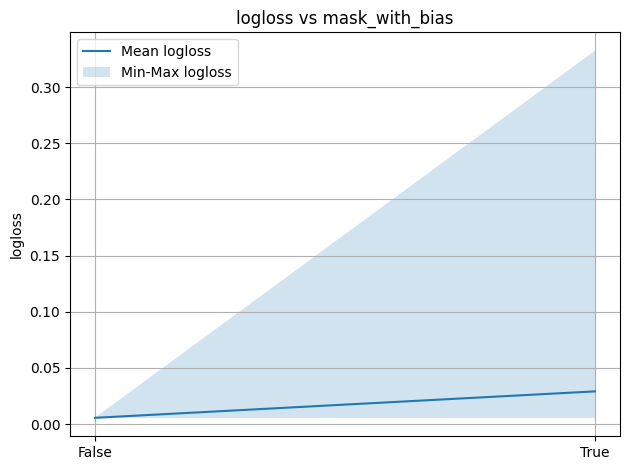

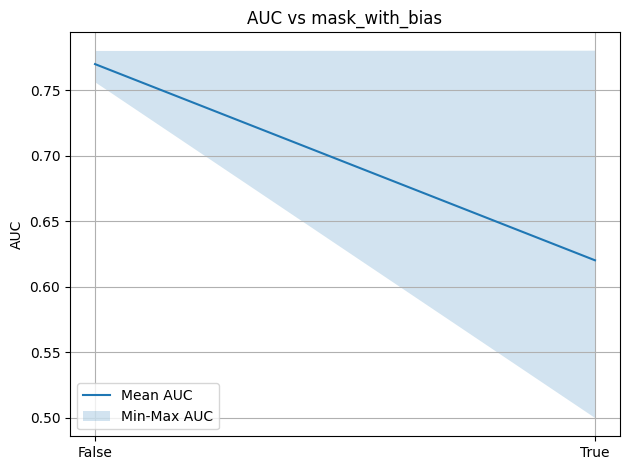

In [108]:
for param in more_than_two_cols:
    unique_values = df[param].unique()
    logloss_lst, auc_lst = [], []

    try:
        unique_values = sorted(unique_values)
    except:
        pass
    for value in unique_values:
        logloss_result = df[df[param] == value]["logloss"]
        auc_result = df[df[param] == value]["AUC"]

        logloss_lst.append([logloss_result.min(), logloss_result.mean(), logloss_result.max()])
        auc_lst.append([auc_result.min(), auc_result.mean(), auc_result.max()])
    logloss_lst = np.array(logloss_lst)
    auc_lst = np.array(auc_lst)
    metric_dict = {
        "logloss": logloss_lst,
        "AUC": auc_lst
    }
    # for metric in metrics:
    #     print(np.arange(len(metric_dict[metric])))
    #     print(metric_dict[metric][:, 1])
    for metric in metrics:
        plt.figure()
        plt.plot(np.arange(len(metric_dict[metric])), metric_dict[metric][:, 1], label=f'Mean {metric}')
        plt.fill_between(np.arange(len(metric_dict[metric])), metric_dict[metric][:, 0], metric_dict[metric][:, 2], alpha=0.2, label=f'Min-Max {metric}')
        plt.xticks(np.arange(len(metric_dict[metric])), unique_values)
        plt.ylabel(metric)
        plt.title(f'{metric} vs {param}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [109]:
results

[{'logloss': 0.011823,
  'AUC': 0.5,
  'batch_norm': True,
  'batch_size': 40960,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'mask_with_bias': True,
  'metrics': ['logloss', 'AUC'],
  'model': 'PGAResNet',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 5,
  'num_heads': 1,
  'num_shallow_cross_layers': 2,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'resnet_detach_param': True,
  'resnet_freeze': True,
  'resnet_pretrain': True,
  'resnet_type': 'resnet18',
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
 

In [110]:
df.sort_values("logloss")[metrics+more_than_two_cols].iloc[:10]

,logloss,AUC,resnet_pretrain,num_deep_cross_layers,resnet_freeze,num_shallow_cross_layers,mask_with_bias
14,0.005544,0.779954,True,5,False,3,False
24,0.005554,0.777927,False,4,False,2,False
31,0.005571,0.772734,False,4,True,3,False
22,0.005571,0.772074,False,4,True,2,False
21,0.005572,0.772096,True,4,False,2,False
7,0.005574,0.778202,False,5,False,2,False
28,0.005579,0.771499,False,4,False,3,True
11,0.005592,0.771513,True,5,True,3,False
15,0.005593,0.769142,False,5,False,3,False
27,0.005601,0.772187,False,4,True,3,True


In [111]:
df.sort_values("AUC", ascending=False)[metrics+more_than_two_cols]

,logloss,AUC,resnet_pretrain,num_deep_cross_layers,resnet_freeze,num_shallow_cross_layers,mask_with_bias
8,0.005693,0.780166,True,5,True,3,True
14,0.005544,0.779954,True,5,False,3,False
6,0.005677,0.778903,True,5,True,2,False
7,0.005574,0.778202,False,5,False,2,False
24,0.005554,0.777927,False,4,False,2,False
31,0.005571,0.772734,False,4,True,3,False
29,0.005622,0.772259,True,4,True,3,False
27,0.005601,0.772187,False,4,True,3,True
21,0.005572,0.772096,True,4,False,2,False
22,0.005571,0.772074,False,4,True,2,False


In [112]:
df[["resnet_pretrain", "AUC", "logloss", "resnet_freeze", "mask_with_bias"]]

,resnet_pretrain,AUC,logloss,resnet_freeze,mask_with_bias
0,True,0.500000,0.011823,True,True
1,True,0.500000,0.011823,False,True
2,True,0.756184,0.005786,False,False
3,False,0.525262,0.332376,True,True
4,False,0.756607,0.005648,True,False
5,False,0.770055,0.005631,False,True
6,True,0.778903,0.005677,True,False
7,False,0.778202,0.005574,False,False
8,True,0.780166,0.005693,True,True
9,True,0.500000,0.011823,False,True


In [113]:
# df.to_pickle(f"{EXP_NAME}_final.pkl")